# <span style='color:royalblue'> <u> The Effect of Feedback on Driver Behaviour </u> </span>
>#### <span style='color:midnightblue'> Author: Greg Carrigan </span>
#### <span style='color:midnightblue'> Thanks to Ian Davidson of GoFar for providing the data </span>

##### <span style='color:darkgreen'> Notebook 1 can be found here: </span>
https://git.generalassemb.ly/DSI-SYD-2/capstone_greg/blob/master/part-04/capstone_greg_part-04_intro_EDA.ipynb 

##### <span style='color:darkgreen'> Notebook 2 can be found here: </span>
https://git.generalassemb.ly/DSI-SYD-2/capstone_greg/blob/master/part-04/capstone_greg_analysis_discussion.ipynb

# <span style='color:royalblue'> <u> Executive Summary </u></span>

 ### <span style='color:royalblue'><u> Introduction </u></span>
 
 <span style='color:midnightblue'> The aim of this project was to analyse data provided by GoFar, a local Sydney company who have developed an adapter that plugs into your car console under the dashboard and collects information as you drive. It connects to a feedback device, known as the "Ray", that is a small device with a row of lights that sits on the dashboard, where the driver can see it. The lights glow blue or red to provide feedback to the driver. The GoFar web site explains the theory: </span>

><span style='color:navy'> <b><i>"Every engine speed has a sweet spot - an optimum position that maximises your power and minimises your fuel consumption. It's where your car runs best and uses the least fuel."</i></b> </span>

 <span style='color:midnightblue'> The Ray glows blue when it determines that you are driving in this sweet spot, and changes to red when you are not. The data that has been provided to me includes trips for both when the Ray is connected and when it is not, i.e. for when the driver is receiving feedback, and when they are not. </span>

<span style='color:midnightblue'> The aim of this project was to analyse this data to determine whether there is any observed difference in driving behaviour when the Ray is on compared to when it is off. The primary emphasis will be on examining whether fuel consumption is reduced, and what variables are most influential in determining fuel consumption. Other variables such as braking activity, speed and sidewise movement will be used in the analysis. </span>

### <span style='color:royalblue'><u> Data</u> </span>

<span style='color:midnightblue'> Data for 24 drivers was provided, comprising approximately 950,000 rows of data. The data consisted of values for speed (km/h), engine rpm, trip distance (km), forward acceleration, sideways acceleration, gyroscope (i.e. rocking), longitude and latitude, a timestamp, trip index, trip ID, whether the Ray is connected and a driver ID. Some of this data was aggregated to provide fuel economy (L/100km), hard braking rate and average speed over each trip. Some data cleansing was necessary, after which data for 19 drivers was able to be analysed. </span>

### <span style='color:royalblue'> <u>Analysis</u> </span>

<span style='color:midnightblue'> The aim of the analysis was to determine whether there was any observed change in driver behaviour when the Ray was on and providing feedback. The main focus was on the fuel economy, with some analysis done on braking as well. </span>

<span style='color:midnightblue'> A t-test showed that there was a statistically significant difference in the mean fuel economy with the Ray on, when looking at all 19 drivers together. The mean was lower, indicating improved fuel economy, which is given in litres used per 100km. Tests on individual drivers showed that only drivers 3, 7 and 15 had a significant difference at the 5% confidence level, also with improved economy. The number of trips per driver ranged between 15 and 151, while there were 1,347 in total. This small number of samples for some drivers means there would have to be a reasonably large difference in the mean fuel economy for the t-test to indicate it was significant. </span>

<span style='color:midnightblue'> To try to find out more about what was contributing to the difference in means, a number of linear regression models were built. Extra variables for the day of the week and the time of the day were created, to add to the trip distance, average speed, rpm, brake rate and the Ray being on or off. </span>

<span style='color:midnightblue'> A model that included all drivers as individual variables was created. In this model the ray_on variable had a p-value of 0.009, showing that it contributed. The predicted versus actual records are shown below, as well as the difference between the predictions for when the ray is on and off. </span> 


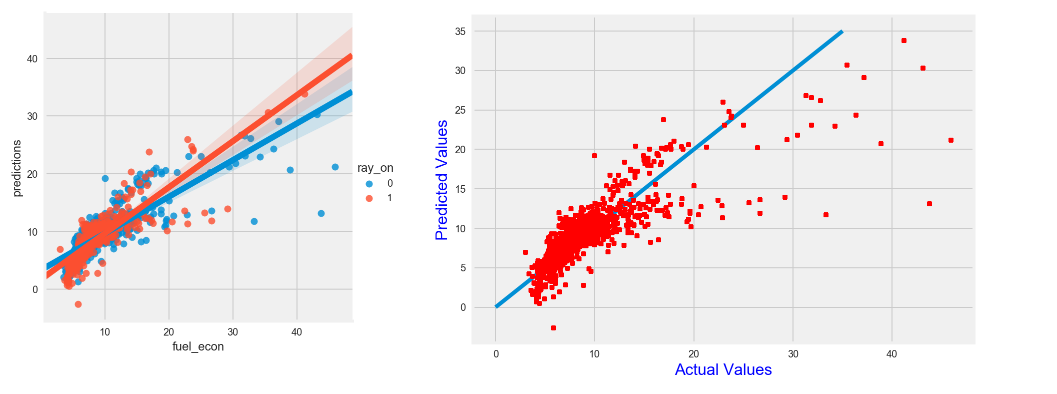

In [2]:
from IPython.display import Image
fig = Image(filename=('../images/lin_reg_all_graphs.png'))
fig

<span style='color:midnightblue'> The regression was run again, this time removing the drivers as variables from the model. Not surprisingly, since there is so much difference in individual drivers, the regression without them performed much more poorly. However, what I wanted to see was whether the ray_on variable was still significant. It returned a p-value of 0.191, meaning that it wasn't. Its effect was tested further by removing it from the model and running it gain. The RMSE increased slightly by 0.0018, indicating the ray_on was not contributing to the model. </span>

<span style='color:midnightblue'> Up to this point, data for all lengths of trips had been included, some less than 200m. A plot of trip distance versus fuel economy showed that the range of fuel economies was much greater for short trips than for longer ones (see below). This could be because a minute spent idling at a set of traffic lights might make a relatively large difference to the fuel economy of a short trip, while hardly affecting a longer one. Considering there is little chance for behaviour to affect fuel economy for short drives, I decided to try analysing the data for trips above 20km. </span>


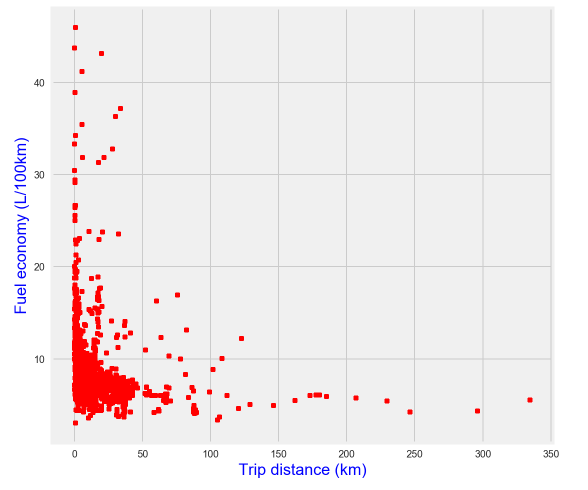

In [3]:
from IPython.display import Image
fig = Image(filename=('../images/outliers.PNG'))
fig


<span style='color:midnightblue'> Another t-test was conducted for individual drivers on their mean fuel economy with the Ray on and off. Only 11 out of the 19 had enough data to be included, and 4 of these, drivers 3, 12, 14 and 15, were found to have different means at the 5% level of significance. Three more regressions were run, this time on individual drivers: driver 7 with all data, then driver 15 with all data and with trips over 20km only. Although the models had reasonably high R-squared scores and low RMSE, none of them indicated that the Ray being on contributed significantly. </span>

<span style='color:midnightblue'> One final regression was run for driver 15 for trips over 20km, this time including a measure of the average change in the x, y and z axis variables. The result indicated that these variables, and probably others in the model, were not contributing. In fact, the only independent variables that were showing as being significant at the 5% level were the average speed and time of day variables.</span>


### <span style='color:royalblue'> <u>Future Direction </u></span>

<span style='color:midnightblue'> Towards the end of my analysis, I began looking at other possible avenues for further investigation. One would be to use different methods for trying to determine what variables are significant. I conducted a Principal Components Analysis, which indicated that the Ray may have a small effect amongst a number of other variables. I also looked briefly at whether setting ray_on as the independent variable could be useful. A logistic regression and SelectKBest feature selection on all the data suggested that the fuel economy was significant to determining whether the Ray was on. However, this is not surprising since it really is just the reverse of what the original t-test showed, that the Ray was significant to fuel economy over the whole population. </span>

<span style='color:midnightblue'> Regarding any changes in braking, a t-test only showed two drivers having a change in the mean rate of hard braking with the Ray on, (one being a significant increase!), but I'm not convinced that aggregating this variable over a trip is very useful. I think that analysis of the individual acceleration records would be more fruitful, especially if more complete and accurate latitude and longitude records were available. A k Nearest Neighbours model was used with some success to impute missing latitudes and longitudes, and with some more refining, might produce even better results. </span>

## <span style='color:royalblue'> <u>Conclusion </u></span>

<span style='color:midnightblue'> Although I was attempting to build as good a model for fuel economy as possible, the purpose of this project wasn't to build a model to predict fuel economy accurately. The goal was simply to see whether the regression models indicated that the ray_on variable was significant. That would give some support to say that the driver's behaviour was being affected by the Ray. I believe that there is some evidence to support this, but it is inconclusive. Because each driver is driving a different vehicle, in different areas and at different times, I am not willing to draw any conclusions from the aggregated data, as the effect of the Ray would be minor compared to these other variables. For individual drivers, even when there seems to be a difference in fuel economy, the models are not showing that the Ray being on is a strong contributor. </span>

<span style='color:midnightblue'> I think that, for further analysis, investigating individual drivers, rather than groups of drivers, would be most beneficial. It is easier to prove a change of behaviour and, after all, the focus is to convince individuals, or maybe fleet managers, to buy the device. The goal isn't to prove change at the population level, which might be required if trying to get government to make a change to a law, for example. As always, more data would be beneficial. This analysis was done with only approximately four weeks' data, which is two weeks with the Ray on and two with it off. </span>

<span style='color:midnightblue'> Dealing with human behaviour also introduces other considerations. It is entirely possible that some of the drivers changed behaviour even without the Ray being connected, as just knowing that data was being collected made them focus on how they were driving in any case. If data were recorded for long enough, some sort of time series analysis could even be conducted, to see whether any effect changed over a longer period. Optimally, this would be conducted over the same route, such as driving to and from work. </span>

<span style='color:midnightblue'> The thought occurred to me that with driverless cars most likely being the way of the future, that the requirement for this device might not be around for more than a decade or two. However, it could also be that there are other uses for it. I recall reading about some crashes involving tests with driverless cars, caused by the cars stopping at orange lights, when the drivers behind weren't expecting it. People drive differently in different countries and even cities - perhaps there's a market to collect information about driving behaviour, to help prepare for the day when people no longer drive at all! </span>